In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\Admin\\webpt\\vetegable\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\Admin\\webpt\\vetegable\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\Admin\\webpt\\vetegable\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:

cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [21]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 484ms/step - accuracy: 0.0335 - loss: 19.2014 - val_accuracy: 0.0585 - val_loss: 3.4705
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 428ms/step - accuracy: 0.0461 - loss: 3.5306 - val_accuracy: 0.1671 - val_loss: 3.2168
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 432ms/step - accuracy: 0.0887 - loss: 3.3361 - val_accuracy: 0.2284 - val_loss: 2.8055
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 424ms/step - accuracy: 0.1260 - loss: 3.0499 - val_accuracy: 0.3816 - val_loss: 2.3593
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 489ms/step - accuracy: 0.1894 - loss: 2.8183 - val_accuracy: 0.4819 - val_loss: 2.0061
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 491ms/step - accuracy: 0.2435 - loss: 2.5868 - val_accuracy: 0.5877 - val_loss: 1.6791
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 445ms/step - accuracy: 0.3283 - loss: 2.2978 - val_accuracy: 0.6267 - val_loss: 1.5955
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 414ms/step - accuracy: 0.3941 - loss: 2.1007 - val_acc

In [25]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - accuracy: 0.9533 - loss: 0.1532
Training accuracy: 0.9576243758201599


In [26]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9505 - loss: 0.2836
Validation accuracy: 0.9442896842956543


In [27]:
cnn.save('trained_model.h5')

In [29]:
training_history.history 

{'accuracy': [0.033707864582538605,
  0.061637237668037415,
  0.09887640178203583,
  0.13964687287807465,
  0.1939004808664322,
  0.2568218410015106,
  0.33065810799598694,
  0.39004814624786377,
  0.4635634124279022,
  0.5158908367156982,
  0.5566613078117371,
  0.6372391581535339,
  0.6539325714111328,
  0.6902086734771729,
  0.71075439453125,
  0.7178170084953308,
  0.7476725578308105,
  0.7894061207771301,
  0.7868378758430481,
  0.8141251802444458,
  0.8321027159690857,
  0.8272873163223267,
  0.8378812074661255,
  0.8558587431907654,
  0.8401284217834473,
  0.863884449005127,
  0.869983971118927,
  0.8667736649513245,
  0.8626003265380859,
  0.8947030305862427,
  0.8905296921730042,
  0.9004815220832825],
 'loss': [7.384072303771973,
  3.4830543994903564,
  3.2685089111328125,
  3.009305715560913,
  2.7959537506103516,
  2.561189651489258,
  2.3103232383728027,
  2.076856851577759,
  1.8079553842544556,
  1.665109634399414,
  1.4861277341842651,
  1.2387089729309082,
  1.20610713

In [30]:
import json
with open('training_his.json','w') as f :
    json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [32]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 94.42896842956543 %


Text(0.5, 1.0, 'Trực quan hoá dữ liệu về độ chính xác')

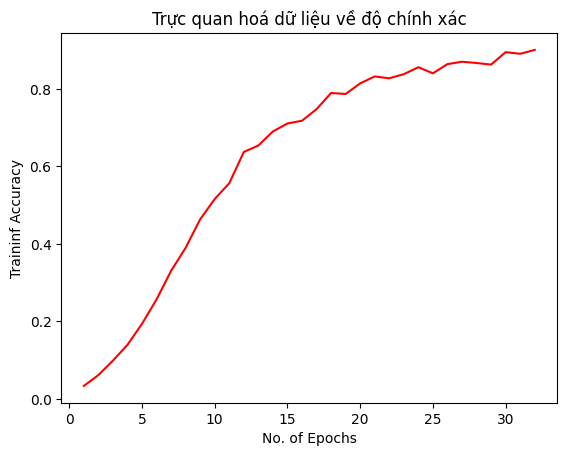

In [33]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traininf Accuracy')
plt.title('Trực quan hoá dữ liệu về độ chính xác')

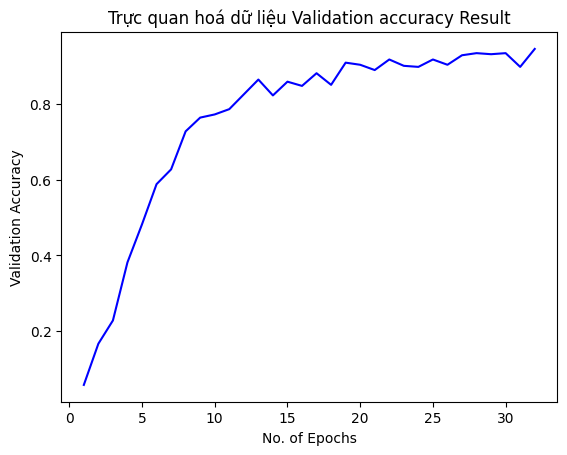

In [34]:
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Trực quan hoá dữ liệu Validation accuracy Result')
plt.show()

In [36]:
test_lost, test_acc = cnn.evaluate(test_set)
print('Test accuracy :', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9453 - loss: 0.2515
Test accuracy : 0.9442896842956543
